 # Loading in the Data



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
url = "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"
original_data = pd.read_csv(url)
reduced_data = original_data[(original_data["Year"] == 2019) |
                             (original_data["Year"] == 2020) |
                             (original_data["Year"] == 2021) |
                             (original_data["Year"] == 2022) ]
file_name = "chicago_crimes_2019-present.csv"
reduced_data.to_csv(file_name, sep=';')
                            

In [7]:
data = pd.read_csv("chicago_crimes_2019-present.csv", sep=";")
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,90,12014684,JD189901,2020-03-17 21:30:00,039XX N LECLAIRE AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,45.0,15.0,06,1141659.0,1925649.0,2020,03/25/2020 03:45:43 PM,41.952052,-87.754660,"(41.952051946, -87.754660372)"
1,183,11864018,JC476123,2019-09-24 08:00:00,022XX S MICHIGAN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,...,3.0,33.0,11,1177560.0,1889548.0,2019,10/20/2019 03:56:02 PM,41.852248,-87.623786,"(41.852248185, -87.623786256)"
2,235,11859805,JC471592,2019-10-13 20:30:00,024XX W CHICAGO AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,...,26.0,24.0,06,1160005.0,1905256.0,2019,10/20/2019 04:03:03 PM,41.895732,-87.687784,"(41.895732399, -87.687784384)"
3,420,12012127,JD189186,2020-03-18 02:03:00,039XX W JACKSON BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,...,28.0,26.0,07,1150196.0,1898398.0,2020,03/25/2020 03:47:29 PM,41.877110,-87.723990,"(41.877110187, -87.723989719)"
4,446,11863808,JC476236,2019-10-05 18:30:00,0000X N LOOMIS ST,0810,THEFT,OVER $500,RESIDENCE,False,...,27.0,28.0,06,1166986.0,1900306.0,2019,10/20/2019 03:56:02 PM,41.882002,-87.662287,"(41.88200224, -87.662286977)"


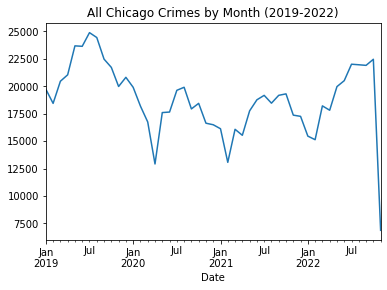

In [ ]:
do = data['Date'].groupby(data.Date.dt.to_period("M")).agg('count')
plt.title('All Chicago Crimes by Month (2019-2022)')
do.plot()

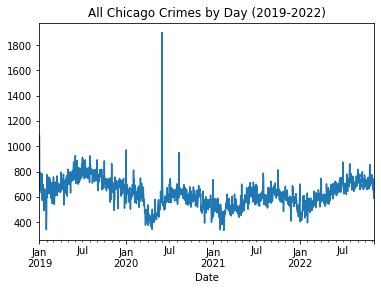

In [ ]:
do1 = data['Date'].groupby(data.Date.dt.to_period("D")).agg('count')
plt.title('All Chicago Crimes by Day (2019-2022)')
do1.plot()

In [ ]:

data['date'] = pd.to_datetime(data['date'])


In [ ]:
data_type = data[["ID", "Case Number", "Primary Type","Description" ,"Arrest"]]
data_type.count()

ID              883216
Case Number     883216
Primary Type    883216
Description     883216
Arrest          883216
dtype: int64

#Frequency of Crimes

<BarContainer object of 12 artists>

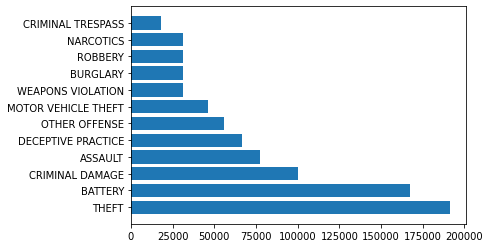

In [ ]:
#Shows the type of crime committed in cases of over 10,000 observations to show us top results. 
data_typedesc = data["Primary Type"]
data_typecount = data["Primary Type"].value_counts()
data_type_majors = data_typecount[data_typecount > 10000]

xs = data_type_majors.index.tolist()
plt.barh(xs, data_type_majors)

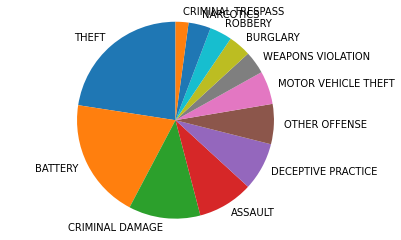

In [ ]:
#Shown in form of pie graph
lab = data_type_majors.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(data_type_majors, labels=lab, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Criminal Trespassing Data

<BarContainer object of 4 artists>

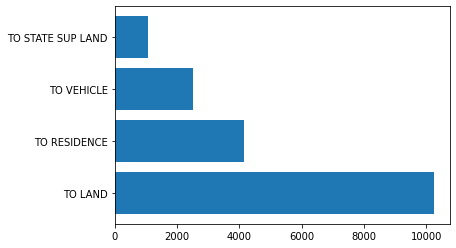

In [ ]:
#Shows what type of land the criminal trespassed on
crim_tres_dat = data["Primary Type"] == "CRIMINAL TRESPASS"
crim_tres_data = data[crim_tres_dat]
data_typedesc3 = crim_tres_data["Description"]
data_typecount3 = crim_tres_data["Description"].value_counts()
data_type_majors3 = data_typecount3[data_typecount3 > 100]


xs3 = data_type_majors3.index.tolist()
plt.barh(xs3, data_type_majors3)

In [ ]:
y_n_arrest2 = (data["Primary Type"] == "CRIMINAL TRESPASS") & (data["Arrest"] == True)
sum(data[y_n_arrest2].value_counts()) / sum(data['Primary Type'] == "CRIMINAL TRESPASS")
#41.8% of those who committed a crime related to trespassing were arrested.

NameError: ignored

## Narcotics Data

<BarContainer object of 11 artists>

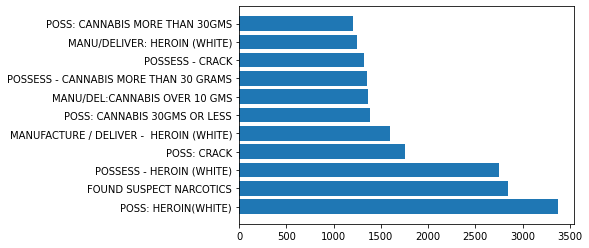

In [ ]:
#Shows the specific narcotic the criminal possessed
narc_dat = data["Primary Type"] == "NARCOTICS"
narc_data = data[narc_dat]
data_typedesc4 = narc_data["Description"]
data_typecount4 = narc_data["Description"].value_counts()
data_type_majors4 = data_typecount4[data_typecount4 > 1000]


xs4 = data_type_majors4.index.tolist()
plt.barh(xs4, data_type_majors4)

In [ ]:
y_n_arrest3 = (data["Primary Type"] == "NARCOTICS") & (data["Arrest"] == True)
sum(data[y_n_arrest3].value_counts()) / sum(data['Primary Type'] == "NARCOTICS")
#95.2% of those who committed a crime related to possessing narcotics were arrested.

0.9518274570579879

## Robbery Data

<BarContainer object of 11 artists>

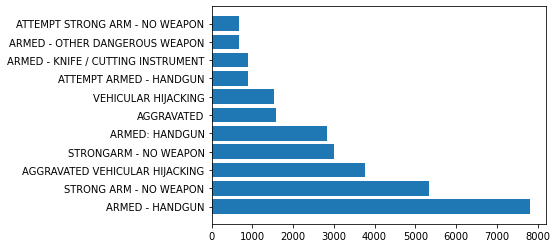

In [ ]:
#Shows what type of weapon the criminal attempted robbery with

rob_dat = data["Primary Type"] == "ROBBERY"
rob_data = data[rob_dat]
data_typedesc5 = rob_data["Description"]
data_typecount5 = rob_data["Description"].value_counts()
data_type_majors5 = data_typecount5[data_typecount5 > 500]


xs5 = data_type_majors5.index.tolist()
plt.barh(xs5, data_type_majors5)

In [ ]:
y_n_arrest4 = (data["Primary Type"] == "NARCOTICS") & (data["Arrest"] == True)
sum(data[y_n_arrest4].value_counts()) / sum(data['Primary Type'] == "NARCOTICS")
#95.2% of those who committed a crime related to possessing narcotics were arrested.

0.9518274570579879

## Burglary Data

<BarContainer object of 4 artists>

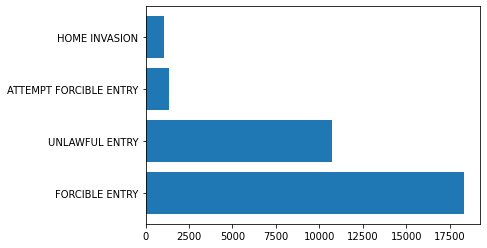

In [ ]:
#Shows what kind of property and the type of entry the criminal burgled.
burg_dat = data["Primary Type"] == "BURGLARY"
burg_data = data[burg_dat]
data_typedesc6 = burg_data["Description"]
data_typecount6 = burg_data["Description"].value_counts()
data_type_majors6 = data_typecount6[data_typecount6 > 100]


xs6 = data_type_majors6.index.tolist()
plt.barh(xs6, data_type_majors6)

In [ ]:
y_n_arrest5 = (data["Primary Type"] == "BURGLARY") & (data["Arrest"] == True)
sum(data[y_n_arrest5].value_counts()) / sum(data['Primary Type'] == "BURGLARY")
#Only 5% of those who committed a crime related to burglarizing were arrested.

0.04992373204525232

## Weapons Violation Data

<BarContainer object of 4 artists>

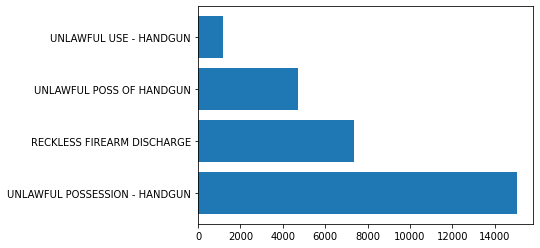

In [ ]:
#Shows the type of weapons violation of the criminal
weap_vio_dat = data["Primary Type"] == "WEAPONS VIOLATION"
weap_vio_data = data[weap_vio_dat]
data_typedesc7 = weap_vio_data["Description"]
data_typecount7 = weap_vio_data["Description"].value_counts()
data_type_majors7 = data_typecount7[data_typecount7 > 1000]


xs7 = data_type_majors7.index.tolist()
plt.barh(xs7, data_type_majors7)

In [ ]:
y_n_arrest6 = (data["Primary Type"] == "WEAPONS VIOLATION") & (data["Arrest"] == True)
sum(data[y_n_arrest6].value_counts()) / sum(data['Primary Type'] == "WEAPONS VIOLATION")
#63.7% % of those who committed a crime related to a weapons violation were arrested.

0.637261753494282

## Motor Vehicle Offense Data

<BarContainer object of 6 artists>

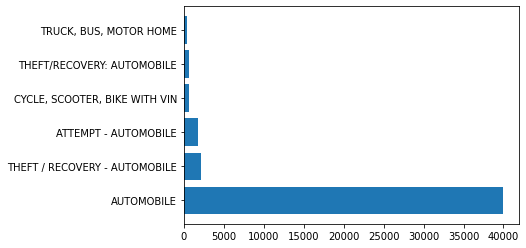

In [ ]:
#Shows the type of vehice relating to the criminal offense.
moto_veh_dat = data["Primary Type"] == "MOTOR VEHICLE THEFT"
moto_veh_data = data[moto_veh_dat]
data_typedesc8 = moto_veh_data["Description"]
data_typecount8 = moto_veh_data["Description"].value_counts()
data_type_majors8 = data_typecount8[data_typecount8 > 300]


xs8 = data_type_majors8.index.tolist()
plt.barh(xs8, data_type_majors8)

In [ ]:
y_n_arrest7 = (data["Primary Type"] == "MOTOR VEHICLE THEFT") & (data["Arrest"] == True)
sum(data[y_n_arrest7].value_counts()) / sum(data['Primary Type'] == "MOTOR VEHICLE THEFT")
#Only 3.84% of those who committed a crime related to motor vehicle theft were arrested.

0.03843570577402232

## Deceptive Practice Data



<BarContainer object of 11 artists>

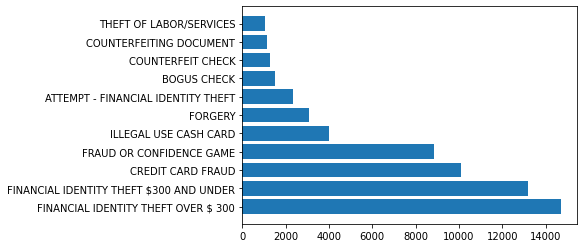

In [ ]:
#Shows the kind of deceptive practice the criminal committed.
decep_prac_dat = data["Primary Type"] == "DECEPTIVE PRACTICE"
decep_prac_data = data[decep_prac_dat]
data_typedesc9 = decep_prac_data["Description"]
data_typecount9 = decep_prac_data["Description"].value_counts()
data_type_majors9 = data_typecount9[data_typecount9 > 1000]


xs9 = data_type_majors9.index.tolist()
plt.barh(xs9, data_type_majors9)

In [ ]:
y_n_arrest8 = (data["Primary Type"] == "DECEPTIVE PRACTICE") & (data["Arrest"] == True)
sum(data[y_n_arrest8].value_counts()) / sum(data['Primary Type'] == "DECEPTIVE PRACTICE")
#Only 2.46% of those who committed a crime related to deceptive practice were arrested.

0.024642931999880227

## Assault Data

<BarContainer object of 5 artists>

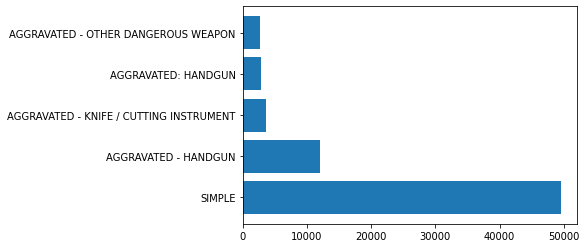

In [ ]:
#Shows type of assault the criminal committed.
asalt_dat = data["Primary Type"] == "ASSAULT"
asalt_data = data[asalt_dat]
data_typedesc10 = asalt_data["Description"]
data_typecount10 = asalt_data["Description"].value_counts()
data_type_majors10 = data_typecount10[data_typecount10 > 2000]


xs10 = data_type_majors10.index.tolist()
plt.barh(xs10, data_type_majors10)

In [ ]:
y_n_arrest9 = (data["Primary Type"] == "ASSAULT") & (data["Arrest"] == True)
sum(data[y_n_arrest9].value_counts()) / sum(data['Primary Type'] == "ASSAULT")
#12.4% of those who committed a crime related to assault were arrested.

0.12421548455555986

## Criminal Damage Data

<BarContainer object of 4 artists>

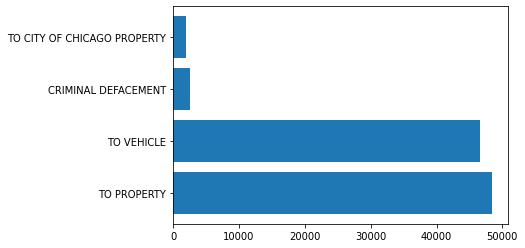

In [ ]:
#Shows what type of object the criminal damaged and the frequency 
crim_dam_dat = data["Primary Type"] == "CRIMINAL DAMAGE"
crim_dam_data = data[crim_dam_dat]
data_typedesc2 = crim_dam_data["Description"]
data_typecount2 = crim_dam_data["Description"].value_counts()
data_type_majors2 = data_typecount2[data_typecount2 > 1000]

xs2 = data_type_majors2.index.tolist()
plt.barh(xs2, data_type_majors2)

In [ ]:
y_n_arrest = (data["Primary Type"] == "CRIMINAL DAMAGE") & (data["Arrest"] == True)
sum(data[y_n_arrest].value_counts()) / sum(data['Primary Type'] == "CRIMINAL DAMAGE")
#Only 4.42% of those who committed a crime related to damaging property were arrested


## Battery Data

<BarContainer object of 6 artists>

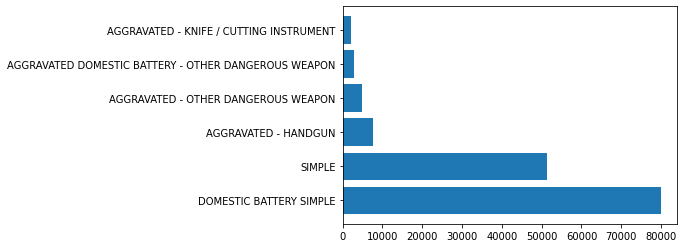

In [ ]:
#Shows weapon the criminal committed battery with.
bat_dat = data["Primary Type"] == "BATTERY"
bat_data = data[bat_dat]
data_typedesc11 = bat_data["Description"]
data_typecount11 = bat_data["Description"].value_counts()
data_type_majors11 = data_typecount11[data_typecount11 > 2000]


xs11 = data_type_majors11.index.tolist()
plt.barh(xs11, data_type_majors11)

In [ ]:
y_n_arrest10 = (data["Primary Type"] == "BATTERY") & (data["Arrest"] == True)
sum(data[y_n_arrest10].value_counts()) / sum(data['Primary Type'] == "BATTERY")
#16.7% of those who committed a crime related to battery were arrested.

0.16703067873790534

## Theft Data

<BarContainer object of 5 artists>

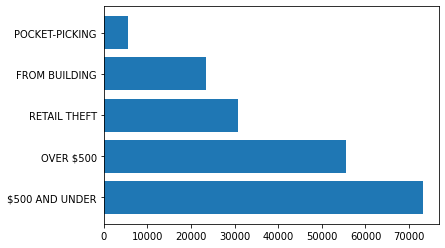

In [ ]:
#Shows the type of theft the criminal committed
theft_dat = data["Primary Type"] == "THEFT"
theft_data = data[theft_dat]
data_typedesc12 = theft_data["Description"]
data_typecount12 = theft_data["Description"].value_counts()
data_type_majors12 = data_typecount12[data_typecount12 > 2000]


xs12 = data_type_majors12.index.tolist()
plt.barh(xs12, data_type_majors12)

In [ ]:
y_n_arrest11 = (data["Primary Type"] == "THEFT") & (data["Arrest"] == True)
sum(data[y_n_arrest11].value_counts()) / sum(data['Primary Type'] == "THEFT")
#6.3% of those who committed a crime related to theft were arrested.

0.06311116224102409

## "Other" Data

<BarContainer object of 9 artists>

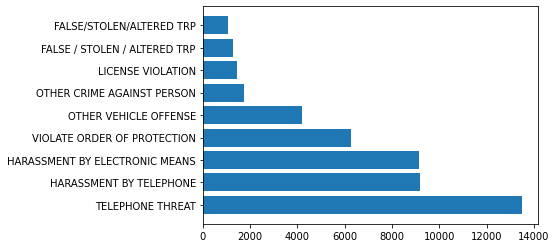

In [ ]:
#Shows the assortment of other data descriptions of the offense that the criminal committed.
other_dat = data["Primary Type"] == "OTHER OFFENSE"
other_data = data[other_dat]
data_typedesc13 = other_data["Description"]
data_typecount13 = other_data["Description"].value_counts()
data_type_majors13 = data_typecount13[data_typecount13 > 1000]


xs13 = data_type_majors13.index.tolist()
plt.barh(xs13, data_type_majors13)

In [ ]:
y_n_arrest12 = (data["Primary Type"] == "OTHER OFFENSE") & (data["Arrest"] == True)
sum(data[y_n_arrest12].value_counts()) / sum(data['Primary Type'] == "OTHER OFFENSE")
#15.7% of those who committed a crime related to battery were arrested.

0.15687292916629356

## K-Means Model

In [32]:
import pandas as pd

900128

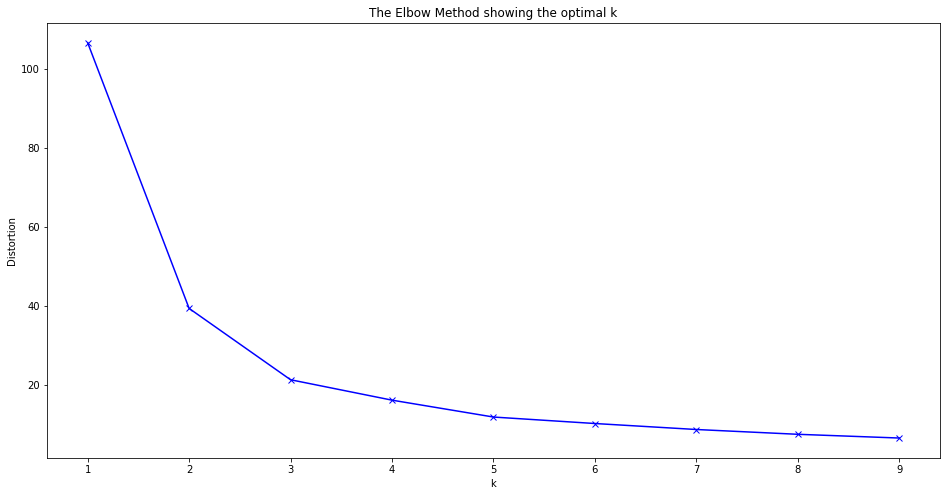

In [75]:
#Use elbow method to determine ideal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Kdata_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#Elbow method shows 3 clusters are ideal

In [35]:
#Each primary type of crime
data['Primary Type'].unique()

array(['THEFT', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'CRIMINAL DAMAGE', 'ASSAULT', 'BATTERY', 'OTHER OFFENSE',
       'NARCOTICS', 'WEAPONS VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS',
       'BURGLARY', 'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'PROSTITUTION',
       'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'SEX OFFENSE', 'STALKING',
       'INTIMIDATION', 'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING',
       'HOMICIDE', 'OBSCENITY', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'RITUALISM'],
      dtype=object)

In [36]:
#Values of each crime
data['Primary Type'].value_counts()

THEFT                                195218
BATTERY                              169751
CRIMINAL DAMAGE                      101913
ASSAULT                               78663
DECEPTIVE PRACTICE                    68119
OTHER OFFENSE                         56709
MOTOR VEHICLE THEFT                   48605
BURGLARY                              32045
WEAPONS VIOLATION                     32007
ROBBERY                               32002
NARCOTICS                             31252
CRIMINAL TRESPASS                     18341
OFFENSE INVOLVING CHILDREN             8015
CRIMINAL SEXUAL ASSAULT                4819
SEX OFFENSE                            4505
PUBLIC PEACE VIOLATION                 4053
INTERFERENCE WITH PUBLIC OFFICER       2890
HOMICIDE                               2774
ARSON                                  1882
PROSTITUTION                           1330
STALKING                               1187
CRIM SEXUAL ASSAULT                     991
LIQUOR LAW VIOLATION            

In [50]:
#Add rows for crimes over 1000 observations so that we can get sums of each crime per community area
data['Theft'] = 0
data.loc[data["Primary Type"] == "THEFT", "Theft"] = 1

data['Battery'] = 0
data.loc[data["Primary Type"] == "BATTERY", "Battery"] = 1

data['Criminal Damage'] = 0
data.loc[data["Primary Type"] == "CRIMINAL DAMAGE", "Criminal Damage"] = 1

data['Assault'] = 0
data.loc[data["Primary Type"] == "ASSAULT", "Assault"] = 1

data['Deceptive Practice'] = 0
data.loc[data["Primary Type"] == "DECEPTIVE PRACTICE", "Deceptive Practice"] = 1

data['Motor Vehicle Theft'] = 0
data.loc[data["Primary Type"] == "MOTOR VEHICLE THEFT", "Motor Vehicle Theft"] = 1

data['Burglary'] = 0
data.loc[data["Primary Type"] == "BURGLARY", "Burglary"] = 1

data['Weapons Violation'] = 0
data.loc[data["Primary Type"] == "WEAPONS VIOLATION", "Weapons Violation"] = 1

data['Robbery'] = 0
data.loc[data["Primary Type"] == "ROBBERY", "Robbery"] = 1

data['Narcotics'] = 0
data.loc[data["Primary Type"] == "NARCOTICS", "Narcotics"] = 1

data['Criminal Trespass'] = 0
data.loc[data["Primary Type"] == "CRIMINAL TRESPASS", "Criminal Trespass"] = 1

data['Offense Involving Children'] = 0
data.loc[data["Primary Type"] == "OFFENSE INVOLVING CHILDREN", "Offense Involving Children"] = 1

data['Criminal Sexual Assault'] = 0
data.loc[data["Primary Type"] == "CRIMINAL SEXUAL ASSAULT", "Criminal Sexual Assault"] = 1

data['Sex Offense'] = 0
data.loc[data["Primary Type"] == "SEX OFFENSE", "Sex Offense"] = 1

data['Public Peace Violation'] = 0
data.loc[data["Primary Type"] == "PUBLIC PEACE VIOLATION", "Public Peace Violation"] = 1

data['Interference With Public Officer'] = 0
data.loc[data["Primary Type"] == "INTERFERENCE WITH PUBLIC OFFICER", "Interference With Public Officer"] = 1

data['Homicide'] = 0
data.loc[data["Primary Type"] == "HOMICIDE", "Homicide"] = 1

data['Arson'] = 0
data.loc[data["Primary Type"] == "ARSON", "Arson"] = 1

data['Prostitution'] = 0
data.loc[data["Primary Type"] == "PROSTITUTION", "Prostitution"] = 1

data['Stalking'] = 0
data.loc[data["Primary Type"] == "STALKING", "Stalking"] = 1

Kdata = data[['Community Area','Theft','Battery','Criminal Damage','Assault','Deceptive Practice','Motor Vehicle Theft', 'Burglary', 'Weapons Violation', 'Robbery','Narcotics','Criminal Trespass','Offense Involving Children','Criminal Sexual Assault','Sex Offense','Public Peace Violation','Interference With Public Officer','Homicide','Arson','Prostitution','Stalking']].groupby('Community Area').sum()
Kdata.head()

,Theft,Battery,Criminal Damage,Assault,Deceptive Practice,Motor Vehicle Theft,Burglary,Weapons Violation,Robbery,Narcotics,Criminal Trespass,Offense Involving Children,Criminal Sexual Assault,Sex Offense,Public Peace Violation,Interference With Public Officer,Homicide,Arson,Prostitution,Stalking
Community Area,,,,,,,,,,,,,,,,,,,,
1.0,4161,2737,1721,1114,1088,541,499,165,519,251,321,86,120,96,39,37,22,12,1,31
2.0,3327,2239,1662,933,1526,640,640,130,407,173,302,104,64,102,37,8,17,22,1,17
3.0,3757,2452,1203,1123,1487,482,442,124,381,149,316,69,116,93,54,19,15,17,0,20
4.0,2253,1158,822,473,844,274,359,35,132,65,202,39,68,42,16,4,4,4,1,11
5.0,1568,460,489,266,712,208,291,24,100,36,121,22,21,27,25,7,5,9,1,7


In [16]:
#Normalize the data
from sklearn.cluster import KMeans
from sklearn import preprocessing
data_values = Kdata.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_values)
Kdata_scaled = pd.DataFrame(x_scaled,
columns=Kdata.columns)

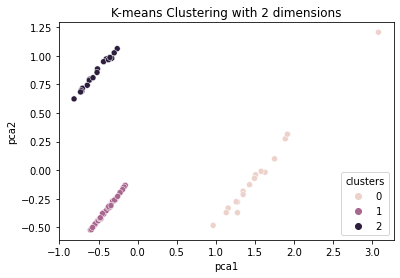

In [86]:
#Plot. 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
clustering_kmeans = KMeans(n_clusters=3,init='k-means++')
Kdata_scaled['clusters'] = clustering_kmeans.fit_predict(Kdata_scaled)
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(Kdata_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=Kdata_scaled['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')

plt.show()

In [71]:
#We can associate likelihood of crime occurring in certain cluster, which helps to identify where crimes are more and less frequent depending on Community area
#For instance, higher likelihood of Theft happening in cluster 2 than in clusters 0 and 1. 
Kdata_scaled.groupby(['clusters']).mean()


,Theft,Battery,Criminal Damage,Assault,Deceptive Practice,Motor Vehicle Theft,Burglary,Weapons Violation,Robbery,Narcotics,Criminal Trespass,Offense Involving Children,Criminal Sexual Assault,Sex Offense,Public Peace Violation,Interference With Public Officer,Homicide,Arson,Prostitution,Stalking
clusters,,,,,,,,,,,,,,,,,,,,
0,0.060728,0.060858,0.086406,0.075449,0.087547,0.074742,0.095979,0.060829,0.063554,0.019326,0.072787,0.096237,0.049027,0.114152,0.058169,0.052937,0.041245,0.054821,0.006408,0.127451
1,0.182441,0.207655,0.253036,0.228883,0.195086,0.212062,0.289772,0.197165,0.185888,0.081581,0.193227,0.249935,0.183244,0.343198,0.224255,0.199380,0.148294,0.151235,0.009714,0.372549
2,0.380846,0.443652,0.490759,0.478823,0.365135,0.443908,0.551422,0.482691,0.459578,0.300237,0.436773,0.448787,0.385990,0.508246,0.514347,0.521051,0.383511,0.359840,0.127586,0.570934
